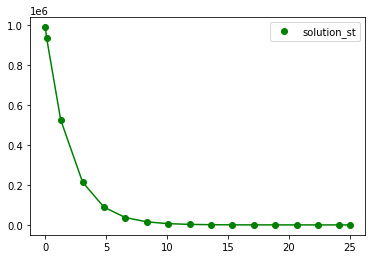

In [123]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d


a = 0.5
b = 0.3
N = 1000000
t0, tf = 0, 25
s0 = 990000
i0 = 7000
r0 = 3000

def dsdt(t, s):
    return -a * s

solution_st = solve_ivp(dsdt, (t0, tf), [s0], dense_output = True)
t, y = solution_st.t, solution_st.y[0]
z, = solution_st.sol(t)
plt.plot(t, z, color = 'g')
plt.plot(t, y, 'o', color = 'g', label = 'solution_st')

plt.legend()


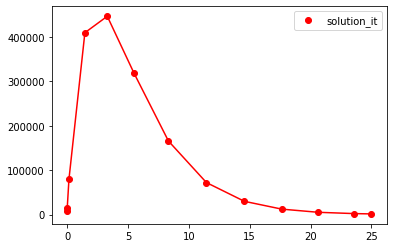

In [124]:
def didt(t, i):
    s = solution_st.sol(t)
    return a * s - b * i

solution_it = solve_ivp(didt, (t0, tf), [i0], dense_output = True)
t, y = solution_it.t, solution_it.y[0]
z, = solution_it.sol(t)
plt.plot(t, z, color = 'r')
plt.plot(t, y, 'o', color = 'r', label = 'solution_it')
plt.legend()

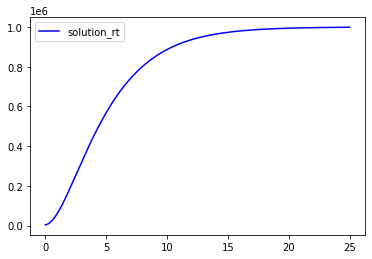

In [125]:
'''
def drdt(t, r):
    i = solution_it.sol(t)
    return b * i

solution_rt = solve_ivp(drdt, (t0, tf), [r0], dense_output = True)
t, y = solution_rt.t, solution_rt.y[0]
'''
solution_rt = []
total_t = np.linspace(t0, tf, 25)
for tt in total_t:
    res = N - solution_it.sol(tt) - solution_st.sol(tt)
    solution_rt.append(res[0])
f = interp1d(total_t, solution_rt, kind ='cubic')
more_t = np.linspace(0, 25, 10000)
plt.plot(more_t, f(more_t), color = 'b', label = 'solution_rt')
plt.legend()

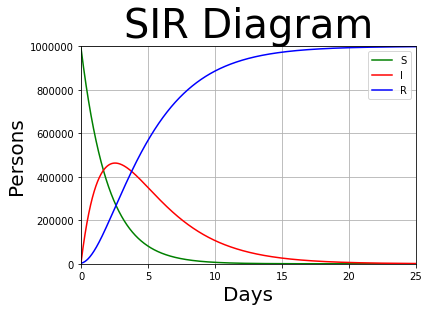

In [128]:
st = solution_st.sol(more_t)
it = solution_it.sol(more_t)

fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.grid()
ax.set_xlim(0, 25)
ax.set_ylim(0, 1000000)
ax.set_title('SIR Diagram', fontsize = 40)
ax.set_xlabel('Days', fontsize = 20)
ax.set_ylabel('Persons', fontsize = 20)

ax.plot(more_t, st[0], color = 'g', label = 'S')
ax.plot(more_t, it[0], color = 'r', label = 'I')
ax.plot(more_t, f(more_t), color = 'b', label = 'R')
ax.legend()